In [9]:
import glob
import geopandas as gpd
import pandas as pd
import os
from matplotlib import pyplot as plt

In [34]:
import pandas as pd

# Load the provided CSV file to check its structure
census_data_path = "census_migrants2022.csv"
census_data = pd.read_csv(census_data_path)

# Display the first few rows of the dataset to understand its structure
census_data.head(), census_data.info()


ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 5


In [10]:
datas_tmp = []
csv_files = glob.glob("./censuses2021/*.csv")
for file in csv_files:
    print(file)
    data = pd.read_csv(file, skiprows=9, encoding='utf-8')
    data.rename(columns={"Educational attainment (detail)": "Municipality of residence", "Unnamed: 1": "Country of origin (large groups)"}, inplace=True)
    data = data.drop(index=0)
    data["Municipality of residence"] = data["Municipality of residence"].str.extract(r'(\D+)', expand=False).str.strip()
    # Convert numeric columns to appropriate data types
    numeric_columns = data.columns[2:]  # Assuming the first two columns are non-numeric
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
    datas_tmp.append(data)

./censuses2021\Censuses2021Barcelona.csv
./censuses2021\Censuses2021Girona.csv
./censuses2021\Censuses2021LLeida.csv
./censuses2021\Censuses2021Tarragona.csv


In [11]:
data.groupby("Municipality of residence").sum().sort_values("Total", ascending=False).shape

(34, 15)

In [12]:
datas = []
csv_files = glob.glob("./censuses2021/*.csv")
for file in csv_files:
    print(file)
    data = pd.read_csv(file, skiprows=9, encoding='utf-8')
    data.rename(columns={"Educational attainment (detail)": "Municipality of residence", "Unnamed: 1": "Country of origin (large groups)"}, inplace=True)
    data = data.drop(index=0)
    data["Municipality of residence"] = data["Municipality of residence"].str.extract(r'(\D+)', expand=False).str.strip()
    # Convert numeric columns to appropriate data types
    numeric_columns = data.columns[2:]  # Assuming the first two columns are non-numeric
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
    datas.append(data)
# datas[0]
combined_datas = pd.concat(datas, ignore_index=True)

./censuses2021\Censuses2021Barcelona.csv
./censuses2021\Censuses2021Girona.csv
./censuses2021\Censuses2021LLeida.csv
./censuses2021\Censuses2021Tarragona.csv


In [13]:
dictionary_municipio = dict()
dictionary_nationality = dict()


for name in combined_datas["Municipality of residence"]:
    dictionary_municipio[name] = 0
    
for name in dictionary_municipio:
    combined_datas.loc[(combined_datas["Municipality of residence"] == name) & (combined_datas["Country of origin (large groups)"] != "Not applicable: has alwarys lived in Spain"), "Country of origin (large groups)"] = "not spain"
    # Group by 'Municipality of residence' and sum the 'not spain' values
    grouped_data = combined_datas[combined_datas["Country of origin (large groups)"] == "not spain"].groupby("Municipality of residence").sum(numeric_only=True).reset_index()
    
    # Update dictionary_municipio with the summed values
    # for name in dictionary_municipio:
        # if name in grouped_data["Municipality of residence"].values:
            # dictionary_municipio[name] = grouped_data[grouped_data["Municipality of residence"] == name]["Total"].values[0]
    # print(grouped_data.head())

for name in sorted(dictionary_municipio):
    print(name)

Abrera
Agramunt
Alcanar
Alcarràs
Alcover
Alella
Almacelles
Alpicat
Altafulla
Ametlla de Mar, L'
Ametlla del Vallès, L'
Amposta
Anglès
Arboç, L'
Arbúcies
Arenys de Mar
Arenys de Munt
Argentona
Artés
Badalona
Badia del Vallès
Balaguer
Banyoles
Barberà del Vallès
Barcelona
Begues
Bellpuig
Berga
Bescanó
Bigues i Riells
Bisbal d'Empordà, La
Blanes
Borges Blanques, Les
Cabrera de Mar
Cabrils
Calafell
Caldes de Malavella
Caldes de Montbui
Calella
Calonge i Sant Antoni
Cambrils
Canet de Mar
Canonja, La
Canovelles
Canyelles
Capellades
Cardedeu
Cassà de la Selva
Castell-Platja d'Aro
Castellar del Vallès
Castellbisbal
Castelldefels
Castelló d'Empúries
Catllar, El
Celrà
Centelles
Cerdanyola del Vallès
Cervelló
Cervera
Constantí
Corbera de Llobregat
Cornellà de Llobregat
Cubelles
Cunit
Deltebre
Dosrius
Escala, L'
Esparreguera
Esplugues de Llobregat
Figueres
Franqueses del Vallès, Les
Garriga, La
Gavà
Gelida
Girona
Gironella
Granollers
Guissona
Hospitalet de Llobregat, L'
Igualada
Llagosta, La
Llago

In [15]:
municipios = gpd.read_file("Spain_map_data.json")
comarca = gpd.read_file("Spain_map_data.json")

955


<Axes: >

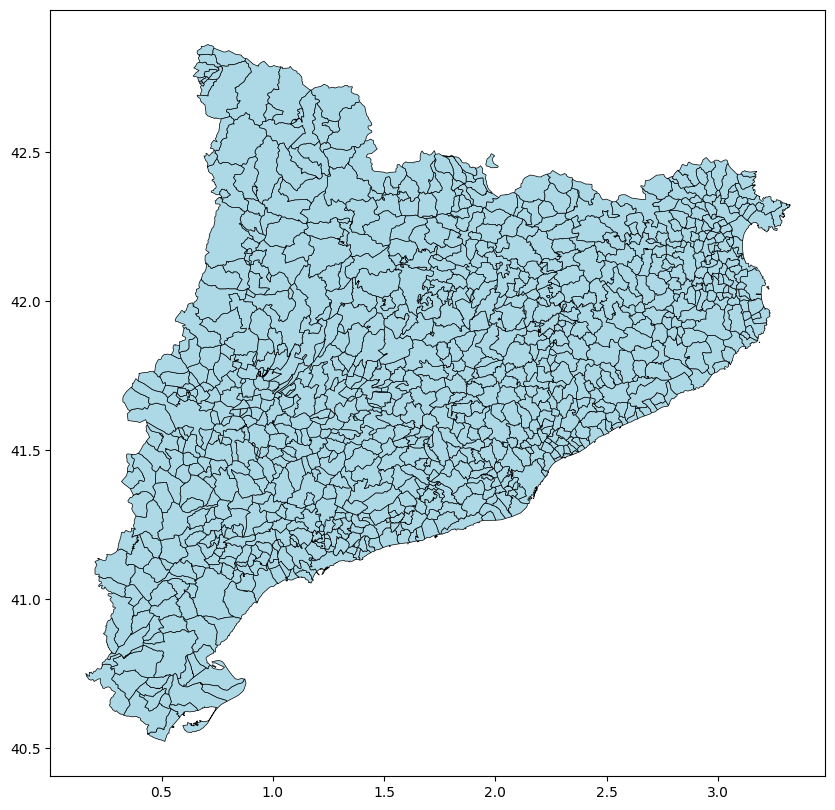

In [16]:
municipios = municipios[municipios["NAME_1"] == "Cataluña"]
print(len(municipios))
municipios.plot(figsize=(10,10), color="lightblue", edgecolor="black", linewidth=0.5)

955


<Axes: >

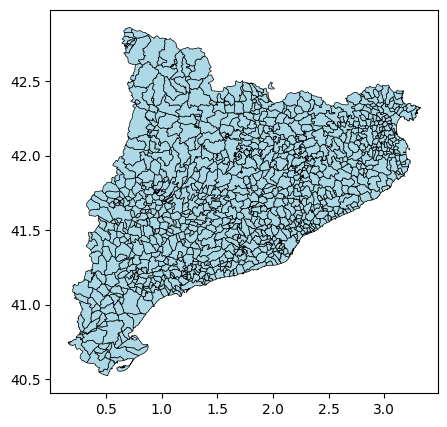

In [17]:
comarca = comarca[comarca["NAME_1"] == "Cataluña"]
print(len(comarca))
comarca.plot(figsize=(5,5), color="lightblue", edgecolor="black", linewidth=0.5)

In [19]:
len(comarca["NAME_3"])

955

In [14]:
di = dict()
for name in municipios["NAME_4"]:
    di[name]=0
print(sorted(di))

['AbelladelaConca', 'Abrera', 'Agramunt', 'AguilardeSegarra', 'Agullana', 'Aiguafreda', 'Aiguamúrcia', 'Aiguaviva', 'Aitona', 'Albanyà', 'Albatàrrec', 'Albesa', 'Albinyana', 'Albons', 'Alcanar', 'Alcanó', 'Alcarràs', 'Alcoletge', 'Alcover', 'Aldover', 'Alella', 'AlfaradeCarles', 'Alfarràs', 'Alforja', 'Alfés', 'Algerri', 'Alguaire', 'Alins', 'Alió', 'Almacelles', 'Almatret', 'Almenar', 'Almoster', 'Alp', 'Alpens', 'Alpicat', 'Altafulla', 'AltÀneu', 'AlàsiCerc', 'AlòsdeBalaguer', 'Amer', 'Amposta', 'Anglesola', 'Anglès', 'Arbeca', 'Arbolí', 'Arbúcies', 'ArenysdeMar', 'ArenysdeMunt', 'Argelaguer', 'Argentona', 'Argençola', 'Arnes', 'Arres', 'Arsèguel', 'ArtesadeLleida', 'ArtesadeSegre', 'Artés', 'Ascó', 'Aspa', 'AvinyonetdePuigventós', 'AvinyonetdelPenedès', 'Avinyó', 'Avià', 'Badalona', 'BadiadelVallès', 'Bagà', 'BaixPallars', 'Balaguer', 'Balenyà', 'Balsareny', 'BanyeresdelPenedès', 'Banyoles', 'Barbens', 'BarberàdelVallès', 'BarberàdelaConca', 'Barcelona', 'Bassella', 'Batea', 'Bausen

In [24]:
grouped_data.shape

(222, 15)

In [25]:
grouped_data.head()

,Municipality of residence,Total,Illiterate,Incomplete primary education,Primary education,First stage of secondary education and the like,"Second stage of secondary education, with general orientation","Second stage of secondary education, with professional orientation",Non-higher post-secondary education,"Vocational education, arts and design and upper level sports and the like; university degrees that require a bachelor's degree, which last 2 years or more","University degrees of 240 ECTS credits, university graduates, own university expert or specialist qualifications and equivalent","University degrees of over 240 ECTS credits, bachelor’s",Specialities in Health Sciences for the residence system and similar,University PhD,Does not live with the spouse or partner
0,Abrera,14007,24,468,1137,3096,1740,1419,9,1371,1275,867,336,60,2202
1,Agramunt,6507,6,273,795,2031,861,426,0,330,480,294,84,21,897
2,Alcanar,11577,30,459,1371,3249,1608,1029,9,822,804,561,207,45,1398
3,Alcarràs,12969,3,768,1818,4707,894,930,15,864,546,333,132,21,1938
4,Alcover,5865,0,255,534,1779,555,534,3,510,411,255,102,18,903


In [26]:
# Merge the data with municipio GeoDataFrame
merged_municipio = municipios.merge(grouped_data, left_on='NAME_4', right_on='Municipality of residence', how='left')
print(len(merged_municipio))
# Divide all columns except 'Municipality of residence' by 'Total'
# columns_to_normalize = merged_municipio.columns.difference(['Municipality of residence', 'geometry'])
# merged_municipio[columns_to_normalize] = merged_municipio[columns_to_normalize].div(merged_municipio['Total'], axis=0)
# print(merged_municipio.head())

955


In [27]:
# # Merge the data with municipio GeoDataFrame
# # Standardize the names in both dataframes before merging
# municipios['NAME_4'] = municipios['NAME_4'].str.replace(' ', '').str.lower()
grouped_data['Municipality of residence'] = grouped_data['Municipality of residence'].str.replace(' ', '').str.lower()

# # Merge the data with municipio GeoDataFrame
# merged_municipio = municipios.merge(grouped_data, left_on='NAME_4', right_on='Municipality of residence', how='left')
# print(len(merged_municipio))
# # Divide all columns except 'Municipality of residence' by 'Total'
# # columns_to_normalize = merged_municipio.columns.difference(['Municipality of residence', 'geometry'])
# # merged_municipio[columns_to_normalize] = merged_municipio[columns_to_normalize].div(merged_municipio['Total'], axis=0)
# # print(merged_municipio.head())

In [28]:
count = 0
for munic in merged_municipio["Total"]:
    if munic> 0:
        count += 1
    # print(munic)
count

117

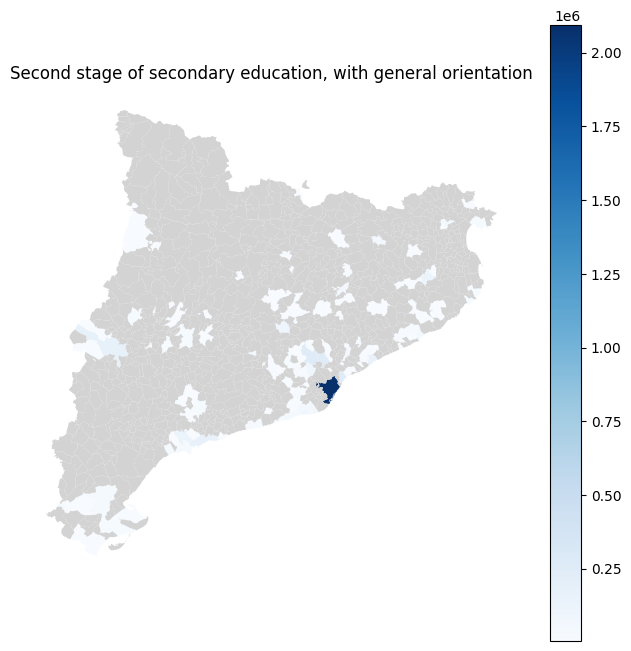

In [31]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_axis_off()
merged_municipio['Second stage of secondary education, with general orientation'] = merged_municipio['Total']
merged_municipio.plot(column='Second stage of secondary education, with general orientation', 
                      cmap='Blues', 
                      legend=True,
                      missing_kwds={'color': 'lightgrey', 'label': 'Missing values'}, 
                      ax=ax)
plt.title('Second stage of secondary education, with general orientation')
plt.show()